# Global Power Plant Database

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Global Power Plant Database.csv")

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label (' Primary Fuel ') data type indicates that dependent variable data is categorical in nature and target / label 'capacity_mw' data type indicates that dependent variable data is continuous in nature.

In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
print('Dataset have',df.shape[0],'rows and',df.shape[1],'columns')

Dataset have 907 rows and 27 columns


In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Checking Data Types

In [9]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Categorical Column = country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source.

Continuous Columns = capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh.

# Checking Null/Missing values

In [11]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh have no data available, so it is better to drop.

# Statistical Summary

In [13]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


From the above description it is observed that columns like capacity_mw, generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

A higher Std than mean in above columns indicates skewness.

# dropping columns estimated_generation_gwh,wepp_id,owner,other_fuel3,other_fuel2,other_fuel1 since they contain insufficient amount of data.

In [20]:
df.drop(columns=['estimated_generation_gwh','wepp_id','owner','other_fuel3','other_fuel2','other_fuel1'],inplace=True)

In [21]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,...,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,...,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,...,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# dropping columns url,country,country_long ,name, gppd_idnr since they don't contribute to building a good model for predicting the target variable values.

In [23]:
df.drop(columns=['country','country_long','name','gppd_idnr','url'],inplace=True)

In [24]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel              object
source                    object
geolocation_source        object
generation_data_source    object
dtype: object

In [27]:
df.source.value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [29]:
df.generation_data_source.value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [30]:
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

dropping columns generation_data_source and source since they don't contribute to building a good model for predicting the target variable values.

In [32]:
df.drop(columns=['generation_data_source','source'],inplace=True)

In [33]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for unique categories in the categorical columns with null values

In [34]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel          object
geolocation_source    object
dtype: object

In [35]:
df.geolocation_source.isnull().sum()

19

In [36]:
df.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

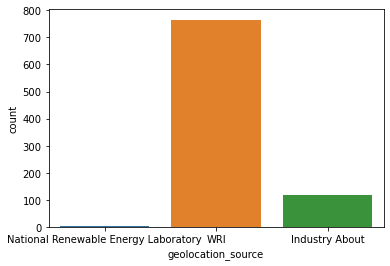

In [37]:
sns.countplot(df.geolocation_source)

In [38]:
df.geolocation_source.isnull().sum()/908*100

2.092511013215859

In [39]:
df.geolocation_source.mode() # most frequently occuring value.

0    WRI
dtype: object

In [41]:
(df['geolocation_source'] == 'WRI').sum()/df.geolocation_source.count()*100 #checking the % share of most frequently occuring value.

86.14864864864865

86.16% of geolocation_source data is 'WRI'.

# Therefore imputing ' WRI' to NaN values in geolocation_source column

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [45]:
si = si.fit(df[['geolocation_source']])

In [46]:
df[['geolocation_source']] = si.transform(df[['geolocation_source']])

In [47]:
df[['geolocation_source']].isnull().sum()

geolocation_source    0
dtype: int64

There are no more null values in 'geolocation_source' column.

Checking for Null values in continuous / discrete columns.

In [50]:
df.select_dtypes(exclude = object).isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013      907
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
generation_gwh_2019      907
dtype: int64

In [51]:
df.latitude

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 907, dtype: float64

In [53]:
df.longitude

0      73.2407
1      74.6090
2      69.3732
3      91.3602
4      82.4091
        ...   
902    77.3568
903    78.1654
904    75.5811
905    73.7477
906    77.4768
Name: longitude, Length: 907, dtype: float64

# Using KNN Imputation technique for imputing missing data.

In [54]:
from sklearn.impute import KNNImputer

In [55]:
imp = KNNImputer(n_neighbors=2)

In [57]:
df[['latitude','longitude']] = imp.fit_transform(df[['latitude','longitude']])

In [58]:
df[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

# There are no more values missing from 'latitude' and 'longitude' columns.

In [59]:
df.commissioning_year.isnull().sum()/len(df)*100

41.89636163175303

41.85% of commissioning_year is NaN

In [60]:
df.commissioning_year.mode()

0    2015.0
dtype: float64

In [62]:
(df['commissioning_year'] == 2015.0).sum()/df.commissioning_year.count()*100 #checking the % share of most frequently occuring value.

5.313092979127135

In [63]:
df.commissioning_year.mean()

1997.0910815939278

In [64]:
df.commissioning_year.median()

2001.0

In [65]:
(df['commissioning_year'] == 1997.0).sum()/df.commissioning_year.count()*100 #checking the % share of mean year value.

1.5180265654648957

In [67]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(df[['commissioning_year']])
df[['commissioning_year']] = si.transform(df[['commissioning_year']])
df[['commissioning_year']].isnull().sum()

commissioning_year    0
dtype: int64

In [68]:
df.commissioning_year = df.commissioning_year.astype('int64') #converting to int data type.

In [69]:
df.commissioning_year

0      2011
1      2001
2      2001
3      2004
4      2015
       ... 
902    2016
903    2001
904    2001
905    2001
906    2001
Name: commissioning_year, Length: 907, dtype: int64

In [70]:
df.year_of_capacity_data.value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

# Dropping column year_of_capacity_data as all the values in it are '2018.0'

In [71]:
df.drop(columns = 'year_of_capacity_data',inplace = True)

In [72]:
df.shape

(907, 13)

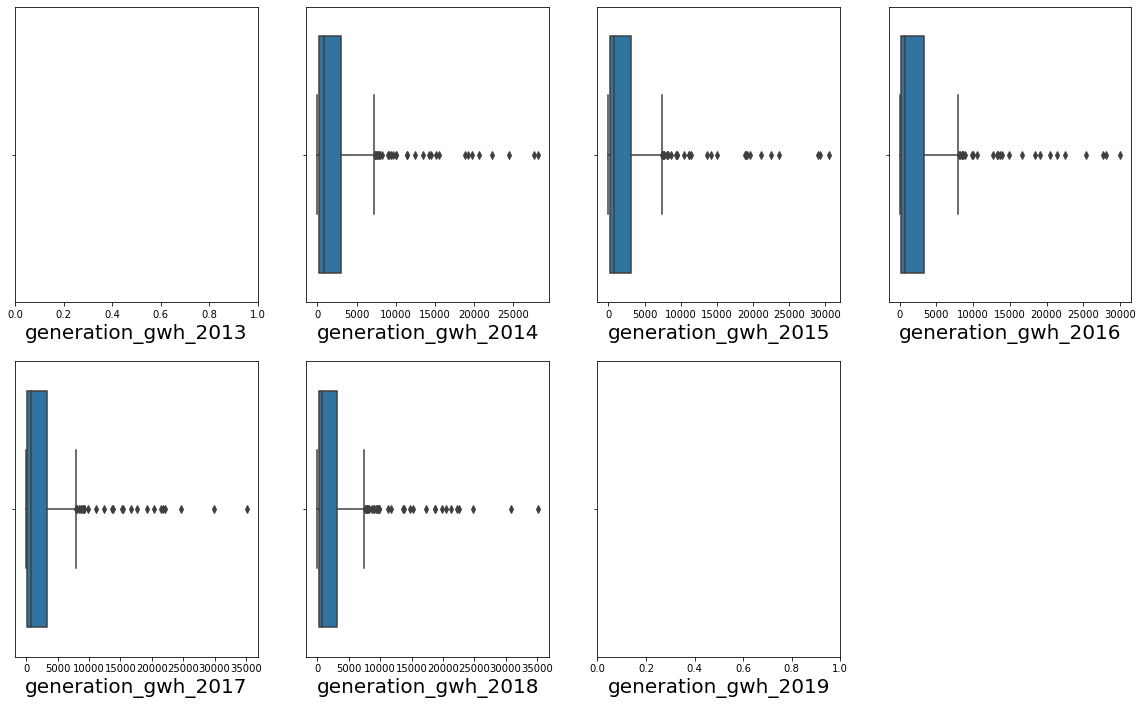

In [73]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source','latitude','longitude','commissioning_year',])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [75]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(df[['generation_gwh_2014']])
df[['generation_gwh_2014']] = si.transform(df[['generation_gwh_2014']])
df[['generation_gwh_2014']].isnull().sum()

generation_gwh_2014    0
dtype: int64

In [76]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(df[['generation_gwh_2015']])
df[['generation_gwh_2015']] = si.transform(df[['generation_gwh_2015']])
df[['generation_gwh_2015']].isnull().sum()

generation_gwh_2015    0
dtype: int64

In [77]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(df[['generation_gwh_2016']])
df[['generation_gwh_2016']] = si.transform(df[['generation_gwh_2016']])
df[['generation_gwh_2016']].isnull().sum()

generation_gwh_2016    0
dtype: int64

In [78]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(df[['generation_gwh_2017']])
df[['generation_gwh_2017']] = si.transform(df[['generation_gwh_2017']])
df[['generation_gwh_2017']].isnull().sum()

generation_gwh_2017    0
dtype: int64

In [79]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(df[['generation_gwh_2018']])
df[['generation_gwh_2018']] = si.transform(df[['generation_gwh_2018']])
df[['generation_gwh_2018']].isnull().sum()

generation_gwh_2018    0
dtype: int64

In [83]:
df.drop(columns=['generation_gwh_2013','generation_gwh_2019'],inplace=True)

In [84]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

# There are no more null values in the dataframe.

Extracting the age of Power plants from commissioning_year column will give a better insight into its relationship with target column data.¶

In [85]:
df['Age'] = df['commissioning_year'].apply(lambda y: 2021 - y)

In [87]:
df.drop(columns=['commissioning_year'],inplace=True)

In [88]:
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,10
1,98.0,24.7663,74.6090,Coal,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20
2,39.2,21.9038,69.3732,Wind,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20
3,135.0,23.8712,91.3602,Gas,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,17
4,1800.0,21.9603,82.4091,Coal,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,6
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,5
903,3.0,12.8932,78.1654,Solar,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,20
904,25.5,15.2758,75.5811,Wind,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20
905,80.0,24.3500,73.7477,Coal,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20


# Analysing the continuous data type Target column

In [89]:
df.capacity_mw

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

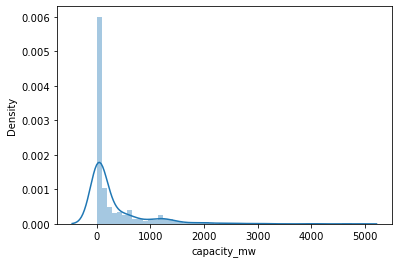

In [90]:
sns.distplot(df.capacity_mw)

In [91]:
df.select_dtypes(include = object).isnull().sum()

primary_fuel          0
geolocation_source    0
dtype: int64

In [92]:
df.capacity_mw.skew()

3.123576153626497

Distribution of data is right skewed.

# Analysing Feature columns with Continuous Data.

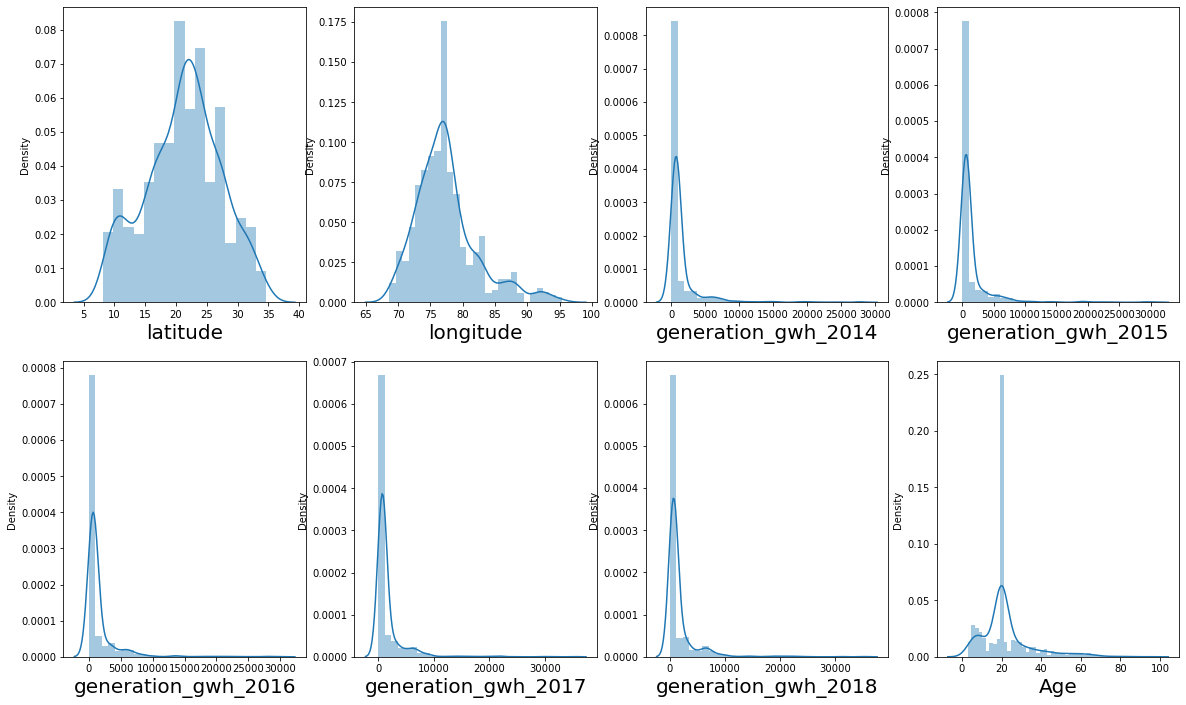

In [93]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

data distributuions are skewed

# capacity_mw vs continuous / discrete data type columns

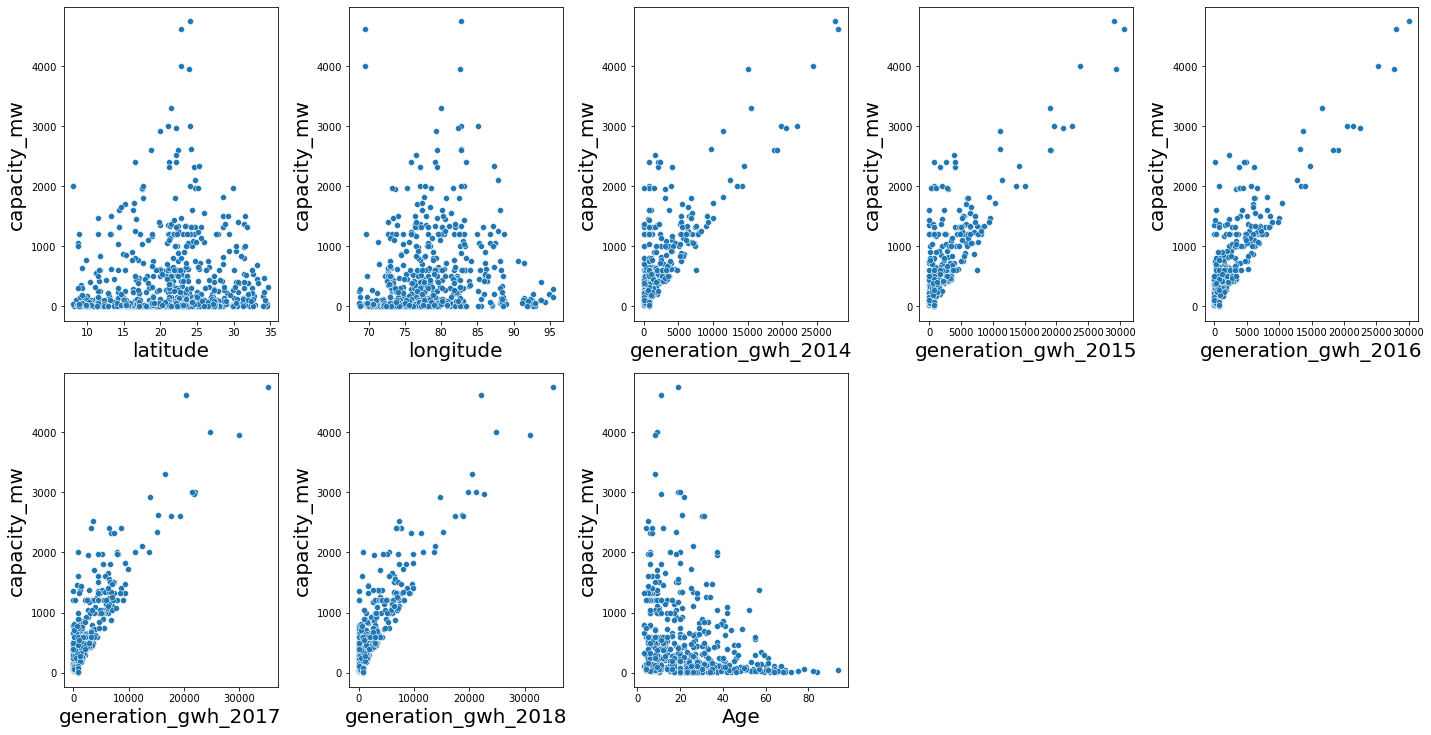

In [94]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['capacity_mw']
X = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

We can observe a linear relationship between columns generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017

<Figure size 432x432 with 0 Axes>

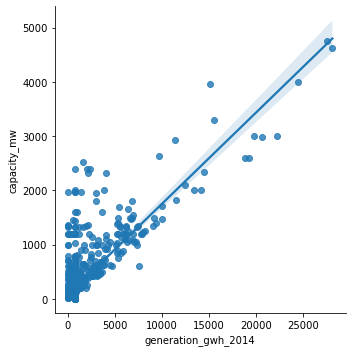

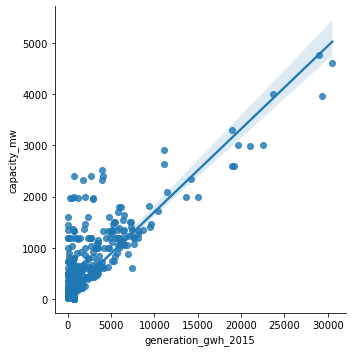

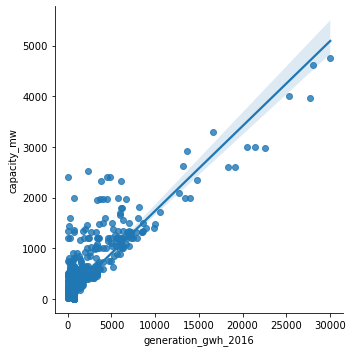

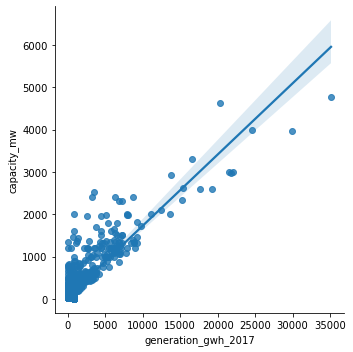

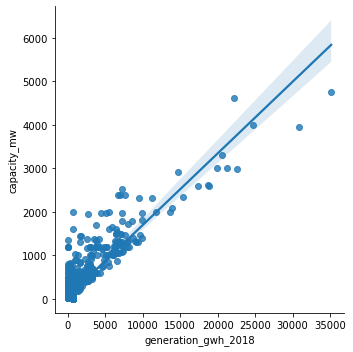

In [96]:
plt.figure(figsize=(6,6),facecolor='white')
X = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for col in X:
    sns.lmplot(x = col,y = 'capacity_mw',data = df)

# capacity_mw vs categorical data type columns

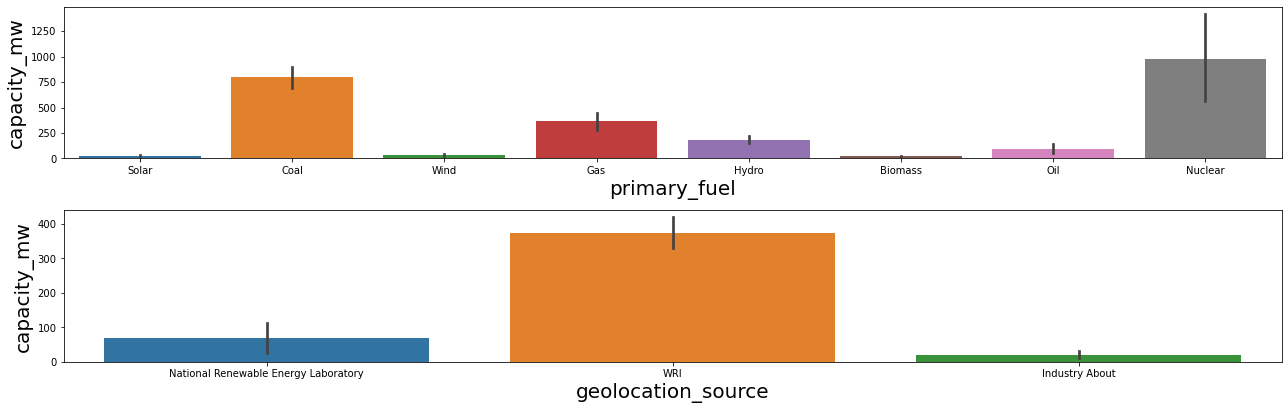

In [97]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = df['capacity_mw']
X =  df[['primary_fuel','geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

from the graphs above it is observed that Nuclear fuel type power plants have the highest capacity followed by coal type.

Most of the data for geolocation source is provided by WRI.

# Analysing the categorical data type Target column

In [98]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are 8 unique categories in primary_fuel

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

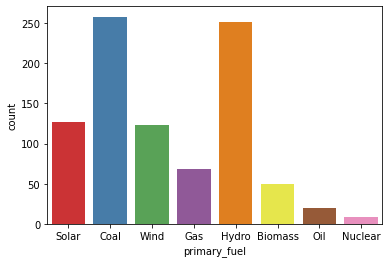

In [99]:
sns.countplot(df['primary_fuel'], palette="Set1")

In [100]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

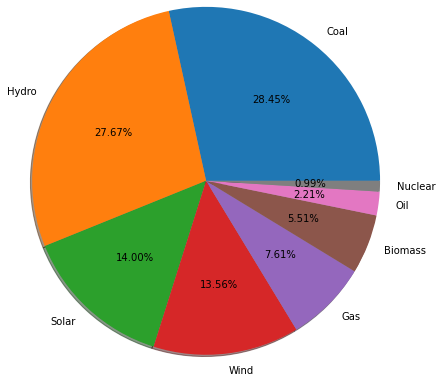

In [101]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig, ax = plt.subplots()
ax.pie(df['primary_fuel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class:

'Coal' : Has 28.52% of total values

'Hydro' : Has 27.53% of total values

'Solar' : Has 13.99% of total values

'Wind' : Has 13.55% of total values

'Gas' : Has 7.60% of total values

'Biomass' : Has 5.51% of total values

'Oil' : Has 2.31% of total values

'Nuclear' : Has 0.99% of total values

Classes are imbalanced.

# 'Primary_fuel' vs Continuous/Discrete Data Columns

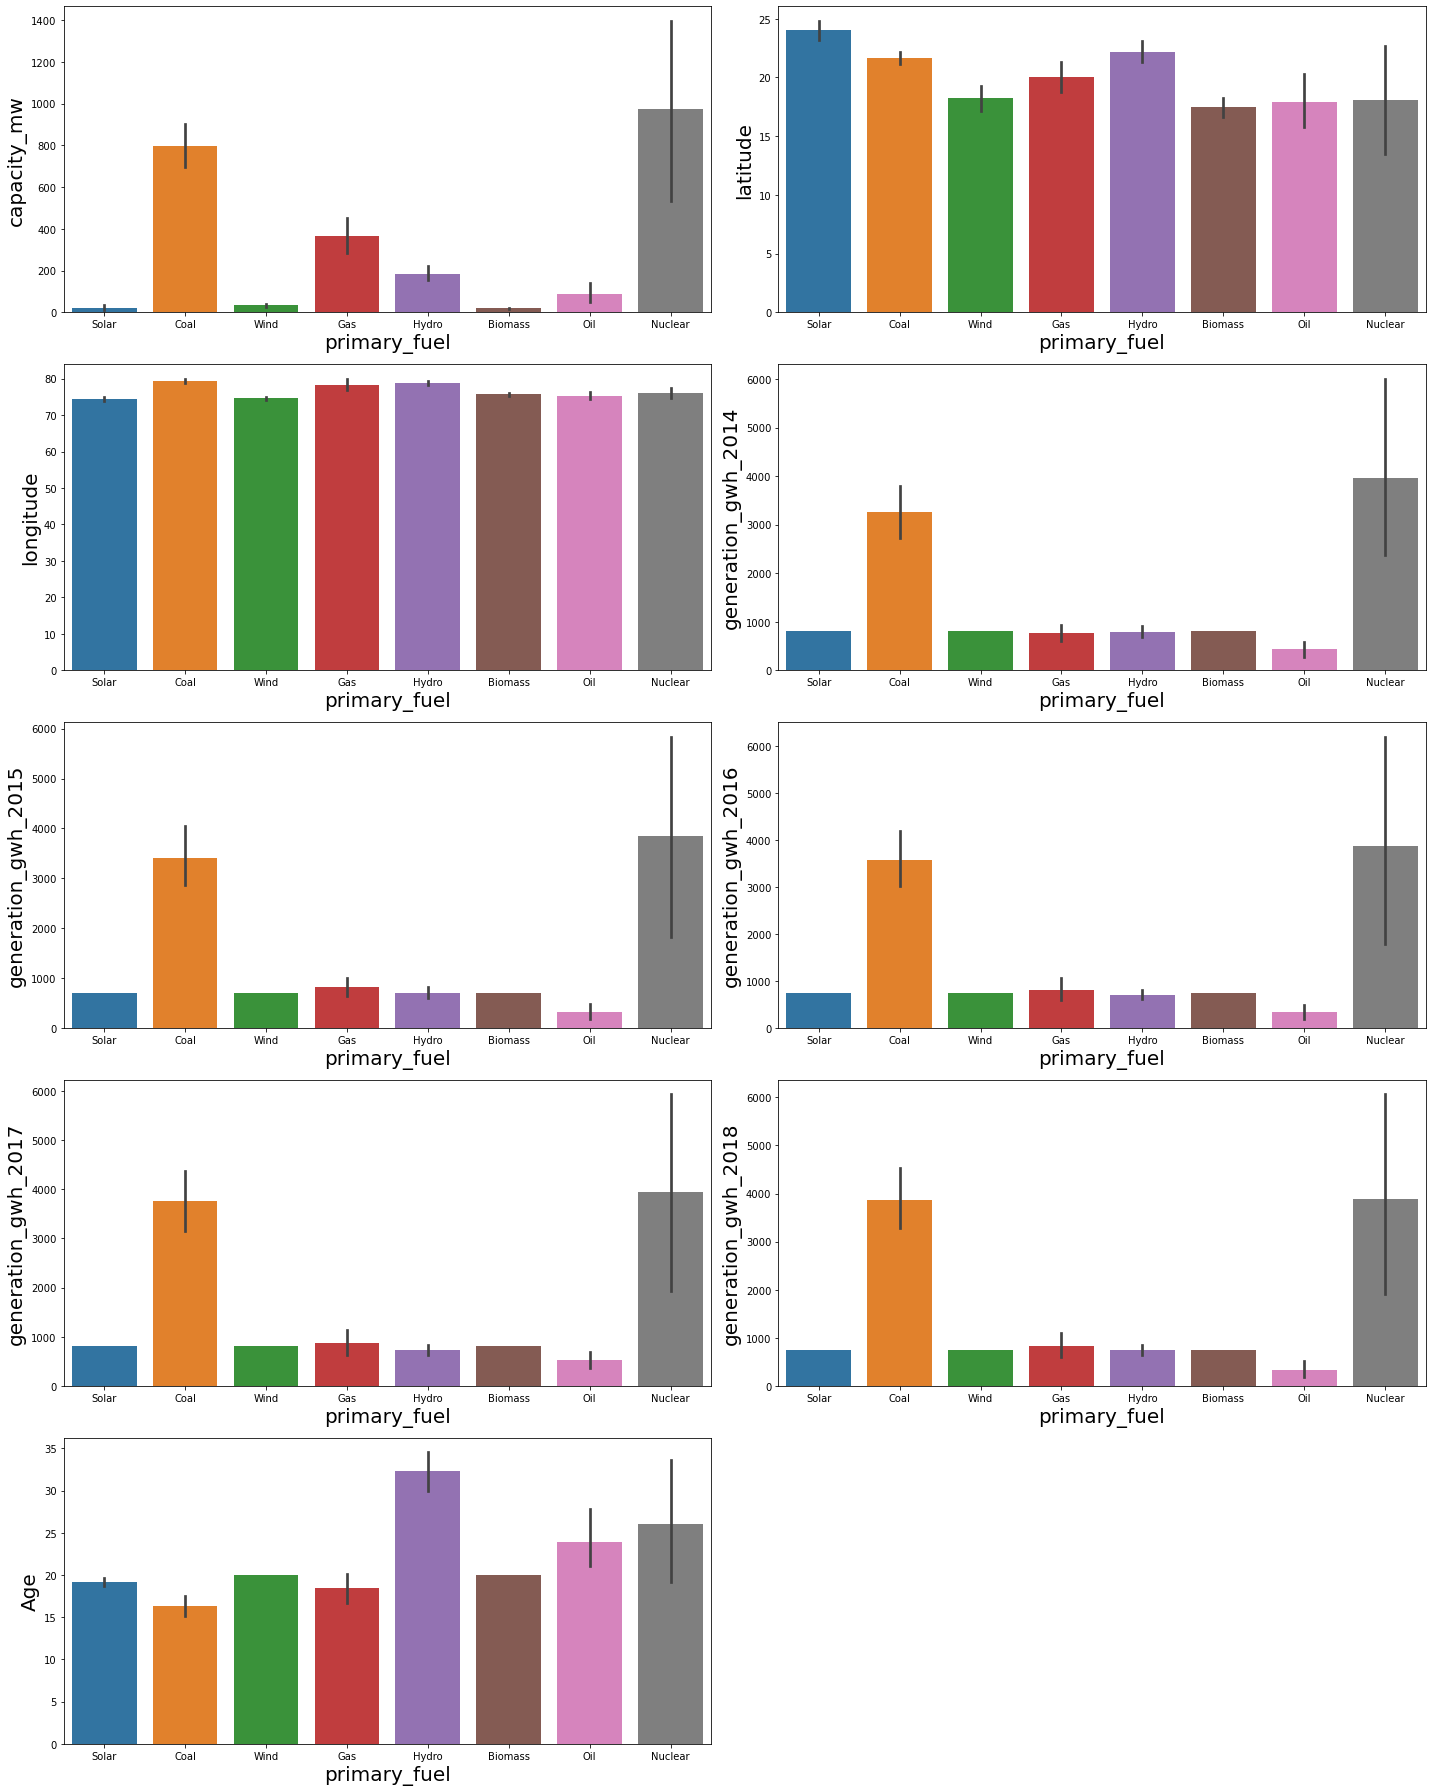

In [102]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['primary_fuel']
X = df.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=15:
        plt.subplot(5,2,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('primary_fuel',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

Highest power generation capacity belongs to Nuclear plants followed by Coal and then by Gas.

Hydro Power Plants have been running for the longest period.

While Power generation is the highest for Nuclear Plants, Power Generation has been on the rise for Coal power plants.

# 'primary_fuel' vs Categorical Data Columns

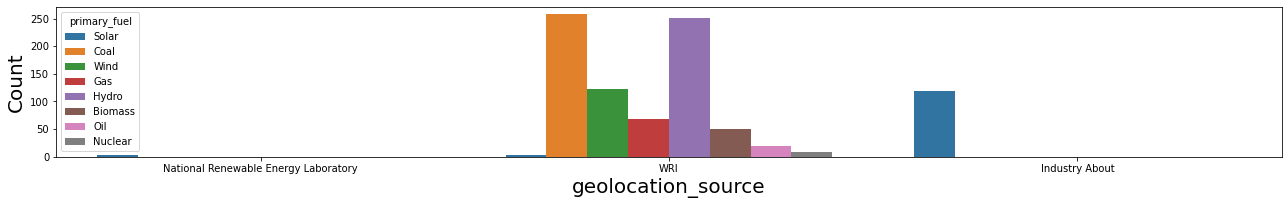

In [103]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = df['primary_fuel']
X =  df[['geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Most of the Geolocation Data is provided by WRI

# Checking for Outliers in columns with continuous distribution

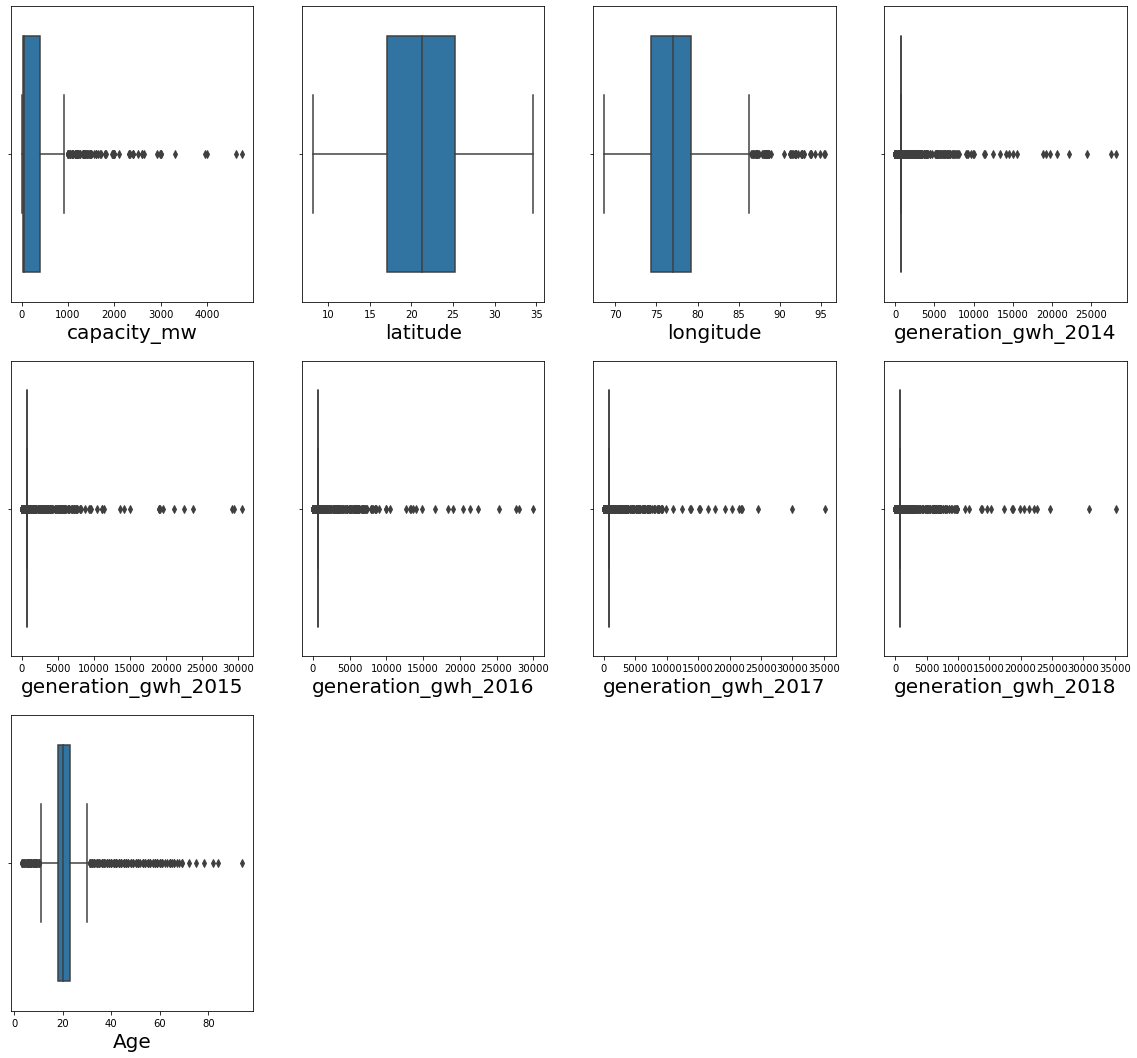

In [104]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = df.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

All columns except latitude have a lot of outliers

In [105]:
df2 = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [106]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

# % Data loss

In [109]:
# checking data loss percentage
print ("Shape of the dataframe before removing outliers: ", df2.shape)
print ("Shape of the dataframe after removing outliers: ", df3.shape)
print ("Percentage of data loss post outlier removal: ", (df2.shape[0]-df3.shape[0])/df2.shape[0]*100)

Shape of the dataframe before removing outliers:  (907, 8)
Shape of the dataframe after removing outliers:  (851, 8)
Percentage of data loss post outlier removal:  6.174200661521499


6.17% Data loss is within acceptable range

In [111]:
dropindx = df.index.difference(df3.index)

In [112]:
df.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [113]:
df.shape

(851, 11)

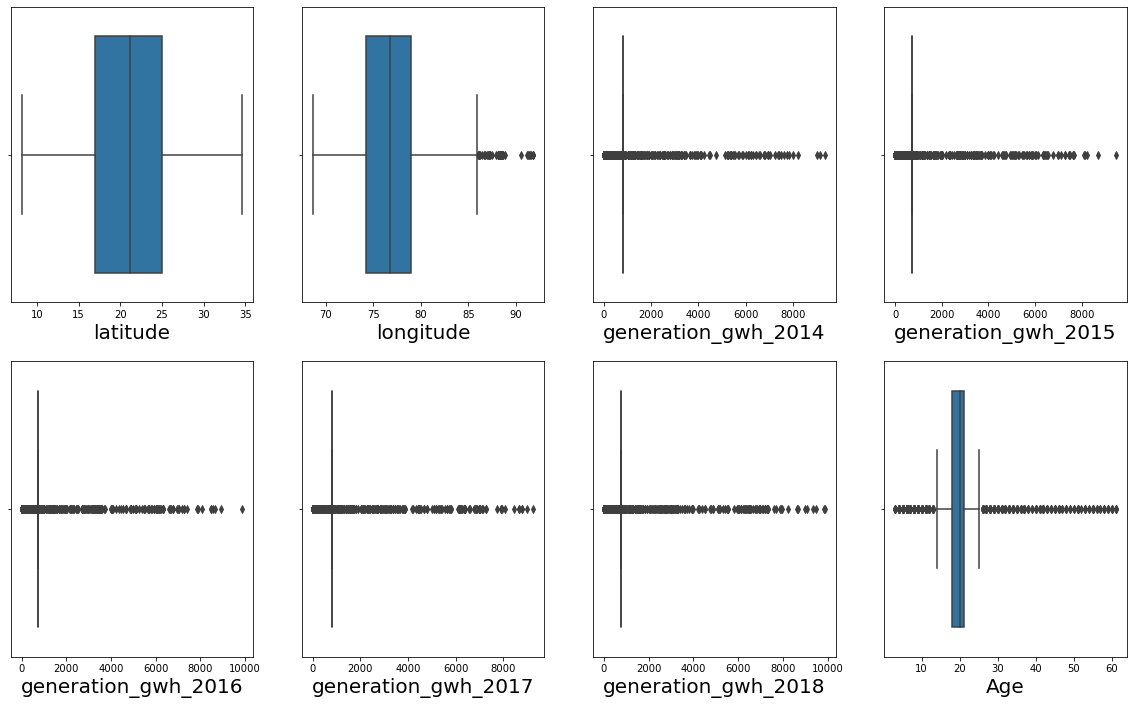

In [114]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed.

# Checking for Skewness in Data

In [115]:
df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).skew()

latitude              -0.119551
longitude              0.918693
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Age                    1.280800
dtype: float64

# Skewness exists in all columns except latitude

# Reducing skewness further using PowerTransformer

In [116]:
from sklearn.preprocessing import PowerTransformer

In [117]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [118]:
df4 = df.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [119]:
transformed= powtrans.fit_transform(df4)

In [120]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [121]:
transformed.skew()

latitude              -0.069485
longitude              0.000058
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Age                    0.026563
dtype: float64

Skewness has been greatly reduced

In [123]:
transformed.index = df.index

In [128]:
df[['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Age']]=transformed[['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Age']]

In [129]:
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
0,2.5,1.171257,-0.930084,Solar,National Renewable Energy Laboratory,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.105732
1,98.0,0.596967,-0.511383,Coal,WRI,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594
2,39.2,0.120520,-2.364717,Wind,WRI,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594
3,135.0,0.447512,2.442641,Gas,WRI,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.248372
4,1800.0,0.129881,1.252442,Coal,WRI,1.426798,2.286603,2.276671,1.983083,2.347272,-1.776648
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.798944,0.217674,Coal,WRI,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983060
903,3.0,-1.345620,0.407395,Solar,Industry About,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594
904,25.5,-0.963692,-0.237493,Wind,WRI,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594
905,80.0,0.527406,-0.770182,Coal,WRI,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594


In [130]:
df2 = df.copy()

# Encoding the categorical Feature Columns.

# Encoding using get_dummies()

In [131]:
dumm = pd.get_dummies(df[['geolocation_source','primary_fuel']],drop_first = False)

In [133]:
df2 = df2.join(dumm)

In [134]:
df2.drop(columns = ['geolocation_source','primary_fuel'],axis = 1, inplace = True)

In [135]:
df2

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,1.171257,-0.930084,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.105732,0,1,0,0,0,0,0,0,0,1,0
1,98.0,0.596967,-0.511383,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1,0,1,0,0,0,0,0,0
2,39.2,0.120520,-2.364717,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1,0,0,0,0,0,0,0,1
3,135.0,0.447512,2.442641,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.248372,0,0,1,0,0,1,0,0,0,0,0
4,1800.0,0.129881,1.252442,1.426798,2.286603,2.276671,1.983083,2.347272,-1.776648,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.798944,0.217674,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983060,0,0,1,0,1,0,0,0,0,0,0
903,3.0,-1.345620,0.407395,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,1,0,0,0,0,0,0,0,0,1,0
904,25.5,-0.963692,-0.237493,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1,0,0,0,0,0,0,0,1
905,80.0,0.527406,-0.770182,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1,0,1,0,0,0,0,0,0


# Finding Correlation

In [136]:
df2.corr()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.050307,0.256838,0.466805,0.519018,0.582540,0.603896,0.613179,-0.331141,-0.231883,-0.032010,0.234923,-0.143825,0.486687,0.063032,-0.101234,0.160586,-0.065498,-0.238330,-0.224380
latitude,0.050307,1.000000,-0.068115,0.105999,0.100775,0.119213,0.100141,0.107471,-0.106203,0.196149,0.073447,-0.207771,-0.151586,0.050766,-0.068712,0.099203,-0.050742,-0.082142,0.205059,-0.192004
longitude,0.256838,-0.068115,1.000000,0.033177,0.033772,0.089248,0.076899,0.098191,-0.144126,-0.293512,-0.085886,0.306214,-0.058114,0.326970,0.007780,0.158658,-0.014544,-0.059282,-0.298920,-0.250225
generation_gwh_2014,0.466805,0.105999,0.033177,1.000000,0.840179,0.783428,0.712174,0.714425,-0.041357,-0.017678,-0.003028,0.018025,-0.011008,0.328479,-0.163067,-0.181090,0.157903,-0.168384,-0.018368,-0.018111
generation_gwh_2015,0.519018,0.100775,0.033772,0.840179,1.000000,0.880793,0.771584,0.770922,-0.105553,-0.019717,-0.003377,0.020103,-0.012278,0.337284,-0.100538,-0.207007,0.116196,-0.189257,-0.020486,-0.020199
generation_gwh_2016,0.582540,0.119213,0.089248,0.783428,0.880793,1.000000,0.895963,0.885985,-0.192430,-0.018498,-0.003168,0.018860,-0.011519,0.387673,-0.146404,-0.219149,0.082791,-0.207532,-0.019220,-0.018950
generation_gwh_2017,0.603896,0.100141,0.076899,0.712174,0.771584,0.895963,1.000000,0.935698,-0.172890,-0.014133,-0.002421,0.014410,-0.008801,0.386078,-0.158242,-0.242864,0.080530,-0.137212,-0.014685,-0.014479
generation_gwh_2018,0.613179,0.107471,0.098191,0.714425,0.770922,0.885985,0.935698,1.000000,-0.182809,-0.022942,-0.003930,0.023392,-0.014286,0.380754,-0.174140,-0.188669,0.097367,-0.210643,-0.023838,-0.023504
Age,-0.331141,-0.106203,-0.144126,-0.041357,-0.105553,-0.192430,-0.172890,-0.182809,1.000000,0.020299,-0.094959,-0.001485,0.012640,-0.340585,-0.070923,0.356023,0.043135,0.053461,-0.019613,0.020796
geolocation_source_Industry About,-0.231883,0.196149,-0.293512,-0.017678,-0.019717,-0.018498,-0.014133,-0.022942,0.020299,1.000000,-0.027573,-0.980783,-0.100244,-0.250004,-0.115381,-0.236911,-0.041481,-0.062245,0.962438,-0.164921


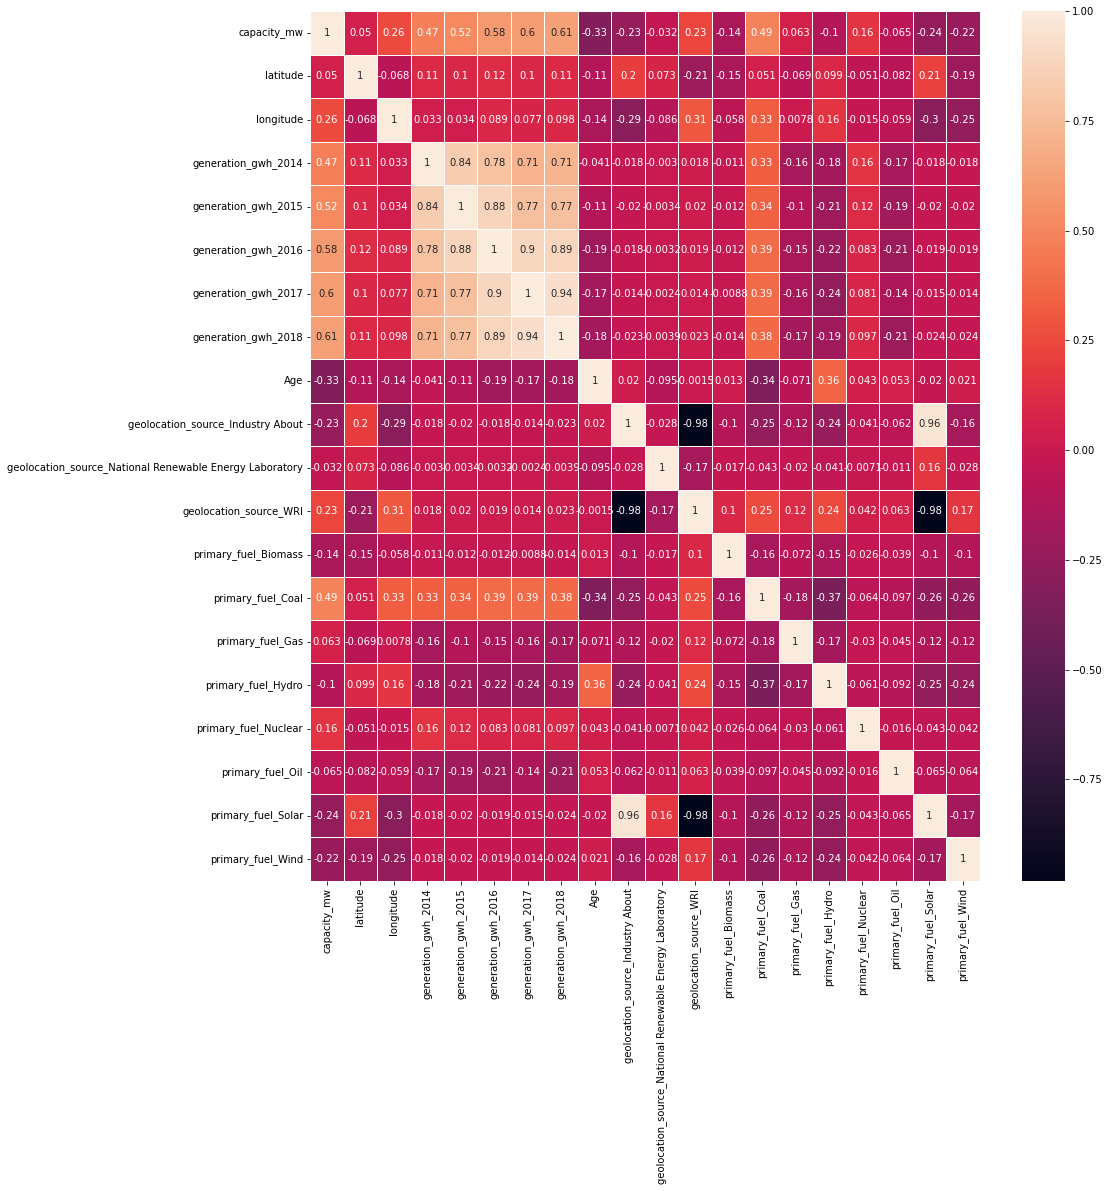

In [138]:
plt.figure(figsize=(15,16))
sns.heatmap(df2.corr(),annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.

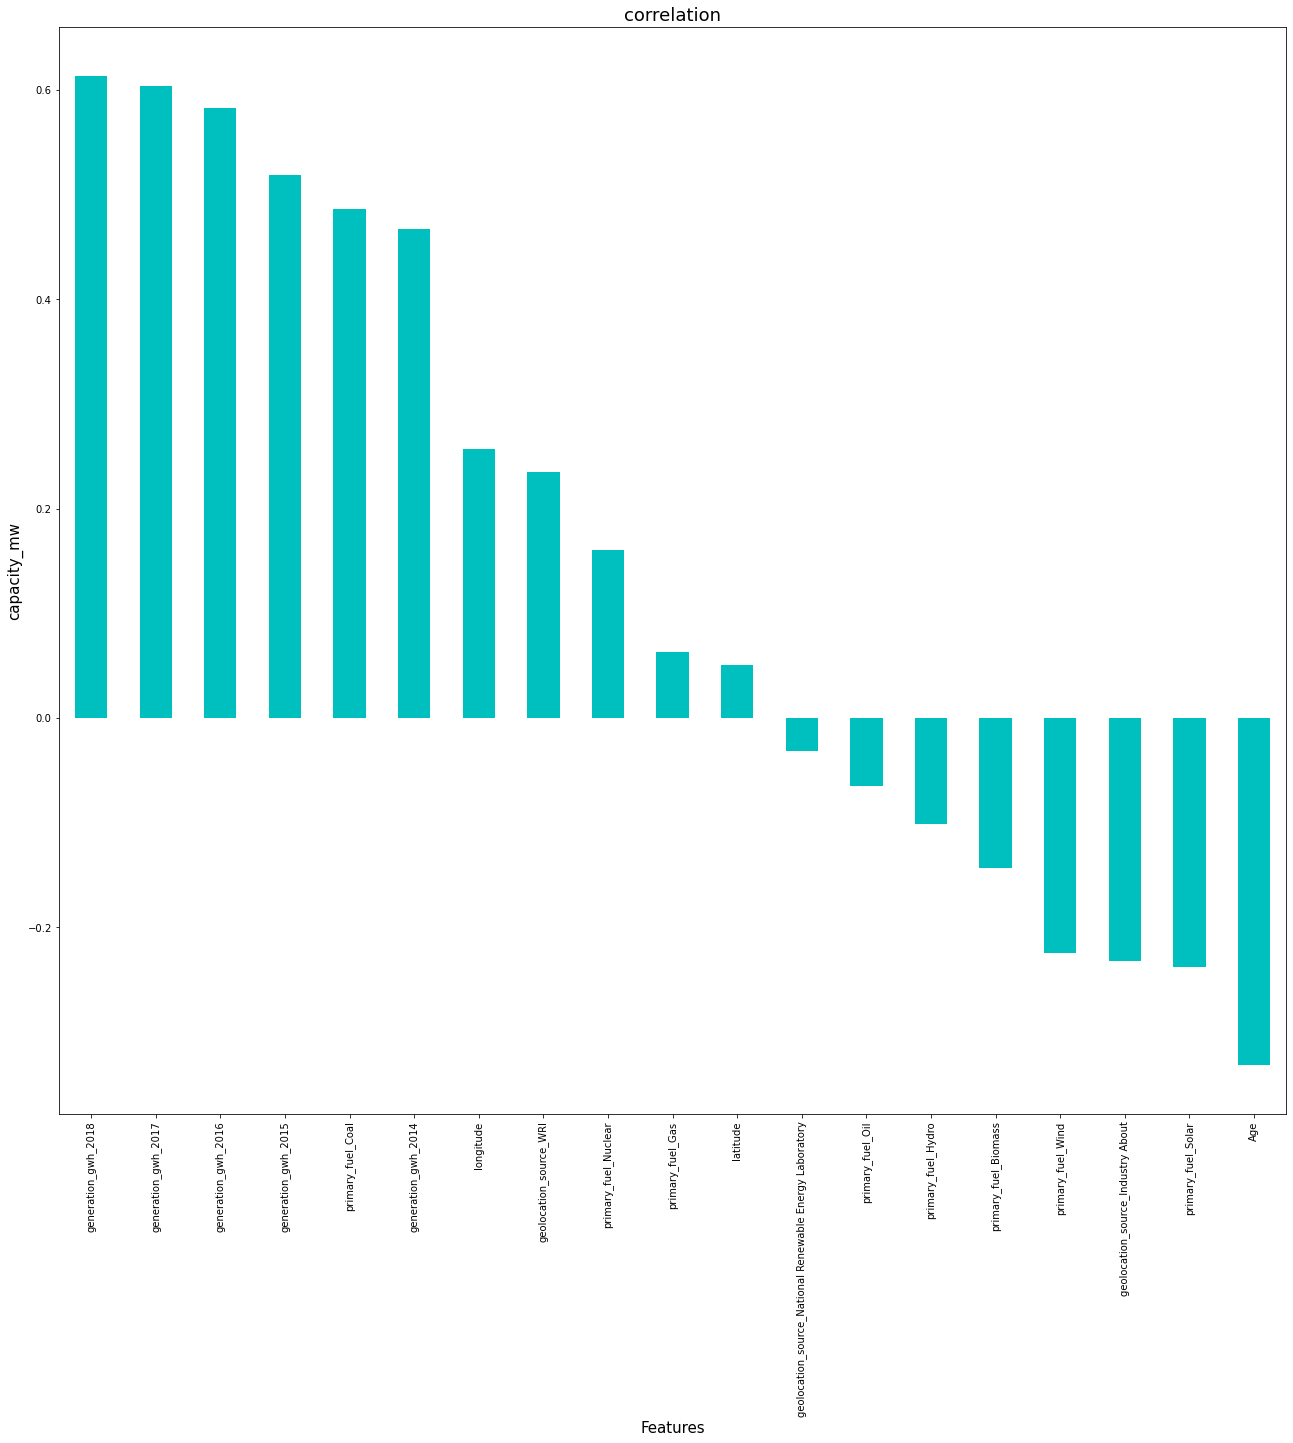

In [139]:
plt.figure(figsize = (22,20))
df2.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

primary_fuel_Coal,generation_gwh_2017,generation_gwh_2016,Longitude,generation_gwh_2015,geolocation_source_WRI have the highest positive correlation, while Age, Primary_fuel_Solar,geolocation_source_Industry About,Primary_fuel_Wind have the highest negative correlation with capacity_mw

# Feature Selection

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
X = df2.drop(columns = ['capacity_mw'])
y = df2['capacity_mw']

In [142]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
vif = pd.DataFrame()

In [145]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [146]:
vif.head(10)

,Features,vif
0,latitude,1.186160
1,longitude,1.366723
2,generation_gwh_2014,3.735443
3,generation_gwh_2015,6.265679
4,generation_gwh_2016,10.112133
5,generation_gwh_2017,10.452660
6,generation_gwh_2018,9.463983
7,Age,1.383426
8,geolocation_source_Industry About,inf
9,geolocation_source_National Renewable Energy L...,inf


multicollinearity exists amongst generation_gwh_2016,generation_gwh_2017,generation_gwh_2018

# Dropping highly multicollinear column: 'generation_gwh_2017'.

In [147]:
x_best = X.drop(columns=['generation_gwh_2016']).copy()

In [148]:
scaled_x_best = scaler.fit_transform(x_best)

# Target/ Label column ('capacity_mw') has Continuous type of Data.

# Regression Model Building

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
from sklearn.metrics import r2_score

# Finding the Best Random State

In [151]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8479770371015952 on random_state: 11


In [152]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state =11)

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [159]:
from sklearn.metrics import r2_score,mean_squared_error

In [160]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

# Training the Models

In [161]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

# Ridge Regression Model

In [162]:
y_r_pred = r.predict(x_test)
r2_score(y_test,y_r_pred)

0.6085365943432243

In [163]:
mean_squared_error(y_test,y_r_pred)

83543.10669706711

In [164]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

289.03824435023665

# Random Forest Regression Model

In [165]:
y_rf_pred = rf.predict(x_test)
r2_score(y_test,y_rf_pred)

0.8444894689016922

In [166]:
mean_squared_error(y_test,y_rf_pred)

33187.86048536648

In [167]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

182.1753564161917

# XGB Regression Model

In [168]:
y_xg_pred = xg.predict(x_test)
r2_score(y_test,y_xg_pred)

0.801295256033631

In [169]:
mean_squared_error(y_test,y_xg_pred)

42406.036902847925

In [170]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

205.92726119396607

# Support Vector Regression Model

In [171]:
y_svr_pred = SV.predict(x_test)
r2_score(y_test,y_svr_pred)


-0.16562715426056696

In [172]:
mean_squared_error(y_test,y_svr_pred)

248759.17470244828

In [173]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

498.7576312222684

# Decision Tree Regression Model

In [174]:
y_dt_pred = dt.predict(x_test)
r2_score(y_test,y_dt_pred)

0.7206786948344962

In [175]:
mean_squared_error(y_test,y_dt_pred)

59610.602837971346

In [176]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

244.15282680725068

# Model Cross Validation

In [177]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

# Ridge Regression

In [178]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()


0.5716555910672904

# Random Forest Regression

In [179]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.7718450117999943

# XGB Regression

In [180]:
cross_val_score(xg,scaled_x_best,y,cv=5).mean()

0.7168206872449284

# SV Regression

In [181]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

-0.1432092608656692

# Decision Tree Regression

In [182]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.5468637104066849

# Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

# Hyper Parameter Tuning

# Random Forest Regressor

In [183]:
parameter = {'n_estimators':[30,60,80,100],'max_depth': [10,20,40,60],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10,20],'criterion':['mse','mae']}

In [184]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [185]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [10, 20, 40, 60],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 80, 100]},
             verbose=1)

In [186]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 30}

In [188]:
Best_mod1 = RandomForestRegressor(n_estimators = 30,criterion = 'mse', max_depth= 20, max_features = 'sqrt',min_samples_leaf = 10, min_samples_split = 20)

In [189]:
Best_mod1.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, max_features='sqrt',
                      min_samples_leaf=10, min_samples_split=20,
                      n_estimators=30)

In [190]:
rfpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

81.84327065301912


# Random Forest Regressor has an accuracy of 81.34%

# Saving The Model

In [193]:
import joblib
joblib.dump(Best_mod1,"BestModelpowercapacity.pkl")

['BestModelpowercapacity.pkl']

# Loading The Model

In [195]:
mod=joblib.load("BestModelpowercapacity.pkl")

In [196]:
print(mod.predict(x_test))

[1301.07991255   90.55895689   25.80244174  274.84879811   27.76808775
   39.48219225 1052.23152577   15.64066662  201.4616139    37.04294458
  679.55359202  170.04795912   14.10129285  166.33796697   27.62273085
   17.16113747  346.90194948  251.35797078  103.90762171  102.57822645
   39.48219225   15.87302408  831.13335895  935.12577428  494.92933358
  752.36150386  125.09935107   16.96876636   27.76808775   34.83556874
   17.7145818    74.68617948  105.53961838   61.04330988   80.42848268
  115.70634368  633.77195828  362.26262386  123.22002962  128.91780907
   44.05691608  347.23382778 1297.35677696  136.98862665  105.17216339
 1317.32746069  876.58344272   25.40190141  304.89996545 1266.6097855
   28.77170761   44.05691608  174.90418827  230.33430858  189.69388964
  694.15482608 1108.27814586   44.74204485   23.22938638   75.04902287
  607.16336067 1299.92202358  213.9512774   407.14637445   91.91144226
  612.40543727   43.93913296  319.40613527   98.9229317   102.90976345
   78.9

In [197]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(20)

,Predictions,Actual Values
368,1301.079913,1240.00
520,90.558957,10.00
412,25.802442,56.25
727,274.848798,43.00
192,27.768088,125.00
838,39.482192,49.60
678,1052.231526,1600.00
832,15.640667,22.00
428,201.461614,105.00
430,37.042945,12.00


# Target/ Label column ('primary_fuel') has Categorical type of Data.

# Classification Model Building

# Encoding the categorical Feature Column.

# Encoding using get_dummies()

In [201]:
dumm = pd.get_dummies(df[['geolocation_source']],drop_first = False)

In [203]:
df.drop(columns = ['geolocation_source'],axis = 1, inplace = True)

# Encoding the Label Column.

Encoding the categorical data using Label Encoding Technique

In [204]:
from sklearn.preprocessing import LabelEncoder

In [205]:
labenc = LabelEncoder()

In [206]:
df['primary_fuel'] = labenc.fit_transform(df['primary_fuel'])

In [207]:
df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,...,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,1.171257,-0.930084,6,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.105732,...,1,0,0,0,0,0,0,0,1,0
1,98.0,0.596967,-0.511383,1,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,...,0,1,0,1,0,0,0,0,0,0
2,39.2,0.120520,-2.364717,7,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,...,0,1,0,0,0,0,0,0,0,1
3,135.0,0.447512,2.442641,2,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.248372,...,0,1,0,0,1,0,0,0,0,0
4,1800.0,0.129881,1.252442,1,1.426798,2.286603,2.276671,1.983083,2.347272,-1.776648,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.798944,0.217674,1,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983060,...,0,1,0,1,0,0,0,0,0,0
903,3.0,-1.345620,0.407395,6,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,...,0,0,0,0,0,0,0,0,1,0
904,25.5,-0.963692,-0.237493,7,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,...,0,1,0,0,0,0,0,0,0,1
905,80.0,0.527406,-0.770182,1,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,...,0,1,0,1,0,0,0,0,0,0


# Finding Correlation

In [209]:
c_corr =df.corr()
c_corr

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,...,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.050307,0.256838,-0.398039,0.466805,0.519018,0.582540,0.603896,0.613179,-0.331141,...,-0.032010,0.234923,-0.143825,0.486687,0.063032,-0.101234,0.160586,-0.065498,-0.238330,-0.224380
latitude,0.050307,1.000000,-0.068115,-0.000873,0.105999,0.100775,0.119213,0.100141,0.107471,-0.106203,...,0.073447,-0.207771,-0.151586,0.050766,-0.068712,0.099203,-0.050742,-0.082142,0.205059,-0.192004
longitude,0.256838,-0.068115,1.000000,-0.406369,0.033177,0.033772,0.089248,0.076899,0.098191,-0.144126,...,-0.085886,0.306214,-0.058114,0.326970,0.007780,0.158658,-0.014544,-0.059282,-0.298920,-0.250225
primary_fuel,-0.398039,-0.000873,-0.406369,1.000000,-0.139275,-0.156228,-0.173195,-0.158198,-0.171149,0.148275,...,0.080782,-0.480885,-0.351295,-0.608020,-0.156880,-0.068067,0.032565,0.115615,0.490051,0.660039
generation_gwh_2014,0.466805,0.105999,0.033177,-0.139275,1.000000,0.840179,0.783428,0.712174,0.714425,-0.041357,...,-0.003028,0.018025,-0.011008,0.328479,-0.163067,-0.181090,0.157903,-0.168384,-0.018368,-0.018111
generation_gwh_2015,0.519018,0.100775,0.033772,-0.156228,0.840179,1.000000,0.880793,0.771584,0.770922,-0.105553,...,-0.003377,0.020103,-0.012278,0.337284,-0.100538,-0.207007,0.116196,-0.189257,-0.020486,-0.020199
generation_gwh_2016,0.582540,0.119213,0.089248,-0.173195,0.783428,0.880793,1.000000,0.895963,0.885985,-0.192430,...,-0.003168,0.018860,-0.011519,0.387673,-0.146404,-0.219149,0.082791,-0.207532,-0.019220,-0.018950
generation_gwh_2017,0.603896,0.100141,0.076899,-0.158198,0.712174,0.771584,0.895963,1.000000,0.935698,-0.172890,...,-0.002421,0.014410,-0.008801,0.386078,-0.158242,-0.242864,0.080530,-0.137212,-0.014685,-0.014479
generation_gwh_2018,0.613179,0.107471,0.098191,-0.171149,0.714425,0.770922,0.885985,0.935698,1.000000,-0.182809,...,-0.003930,0.023392,-0.014286,0.380754,-0.174140,-0.188669,0.097367,-0.210643,-0.023838,-0.023504
Age,-0.331141,-0.106203,-0.144126,0.148275,-0.041357,-0.105553,-0.192430,-0.172890,-0.182809,1.000000,...,-0.094959,-0.001485,0.012640,-0.340585,-0.070923,0.356023,0.043135,0.053461,-0.019613,0.020796


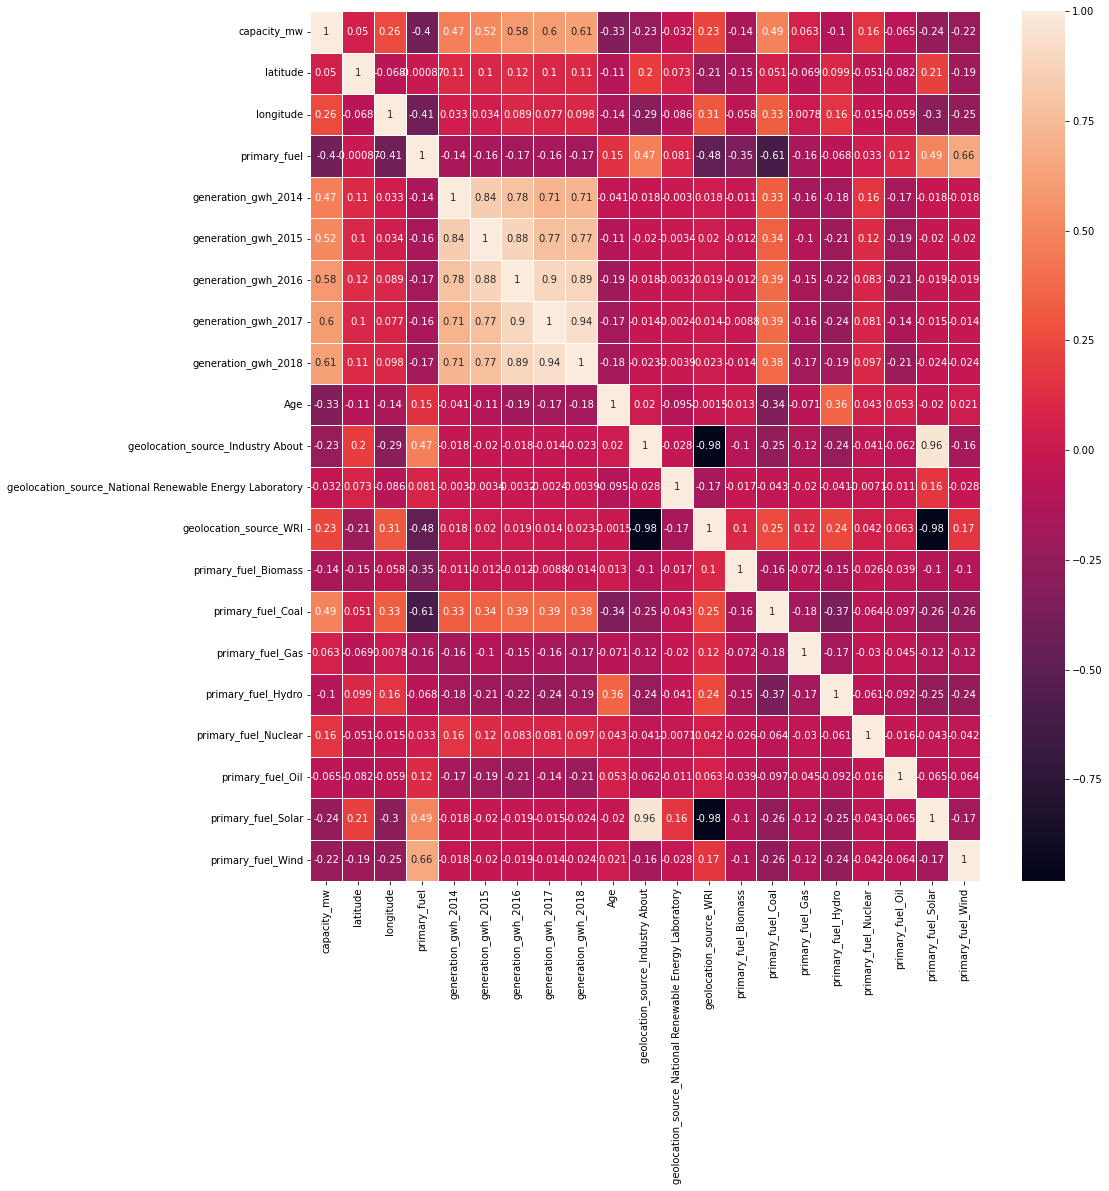

In [210]:
plt.figure(figsize=(15,16))
sns.heatmap(c_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.

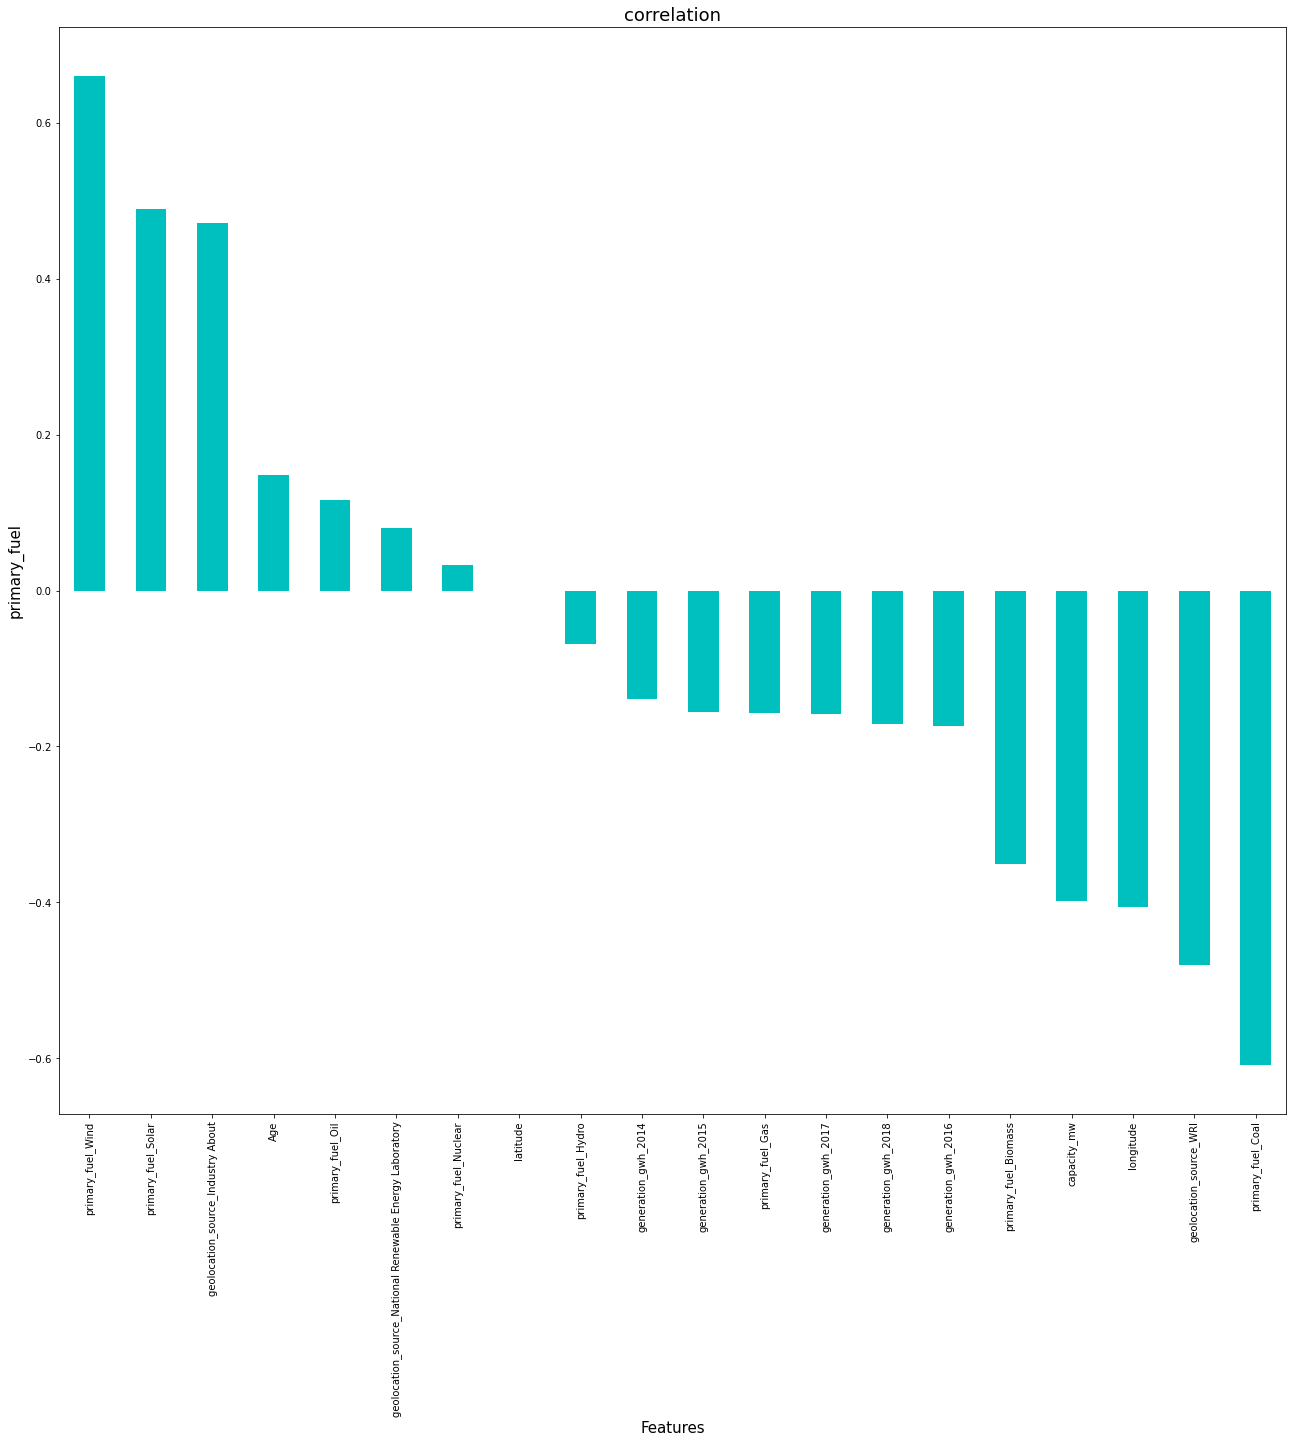

In [211]:
plt.figure(figsize = (22,20))
df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('primary_fuel',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

# geolocation_source_Industry About has the highest positive correlation followed by Age,Geolocation_source_WRI,longitude and capacity_mw have the highest negative correlation with primary_fuel

In [212]:
X = df.drop(columns = ['primary_fuel'])
y = df['primary_fuel']

# Feature Selection

In [213]:
from sklearn.preprocessing import StandardScaler

In [214]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [216]:
vif = pd.DataFrame()

In [217]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [218]:
vif.head(10)

,Features,vif
0,capacity_mw,2.542212
1,latitude,1.191668
2,longitude,1.367232
3,generation_gwh_2014,3.736976
4,generation_gwh_2015,6.277087
5,generation_gwh_2016,10.112136
6,generation_gwh_2017,10.577088
7,generation_gwh_2018,9.653030
8,Age,1.504006
9,geolocation_source_Industry About,inf


multicollinearity exists among generation_gwh_2014,generation_gwh_2016,generation_gwh_2015

# Principle Component Analysis

In [219]:
from sklearn.decomposition import PCA

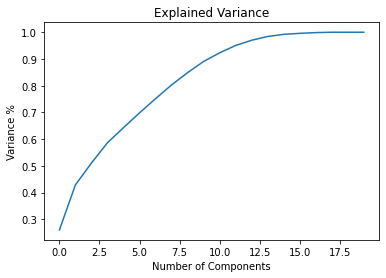

In [220]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

# 10 components explain around 95% variance in Data

# Selecting Kbest Features

In [222]:
from sklearn.feature_selection import SelectKBest, f_classif

In [223]:
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [224]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(64,'Score'))

                                              Feature        Score
19                                  primary_fuel_Wind          inf
18                                 primary_fuel_Solar          inf
17                                   primary_fuel_Oil          inf
16                               primary_fuel_Nuclear          inf
15                                 primary_fuel_Hydro          inf
14                                   primary_fuel_Gas          inf
13                                  primary_fuel_Coal          inf
12                               primary_fuel_Biomass          inf
11                             geolocation_source_WRI  3129.232416
9                   geolocation_source_Industry About  1513.317316
0                                         capacity_mw    57.331958
2                                           longitude    36.427739
5                                 generation_gwh_2016    32.642821
7                                 generation_gwh_2018    32.53

# Dropping highly collinear column 'generation_gwh_2016' and column with lowest sccore

In [225]:
x_best = X.drop(columns=['generation_gwh_2016','geolocation_source_National Renewable Energy Laboratory']).copy()

In [226]:
scaled_x_best = scaler.fit_transform(x_best)

# Classification Model Building

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [228]:
from imblearn.over_sampling import SMOTE as sm

In [229]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y.ravel()) #since class imbalace exists

# Finding the best random state

In [230]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 1.0 on random_state: 1


In [233]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31,random_state = 1)

In [234]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [235]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [236]:
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC(probability=True)
KNN = KNeighborsClassifier()

# Training the Models

In [237]:
RFC.fit(x_train,y_train.ravel())
XGBC.fit(x_train,y_train.ravel())
adbc.fit(x_train,y_train.ravel())
SV.fit(x_train,y_train.ravel())
LOGR.fit(x_train,y_train.ravel())
KNN.fit(x_train,y_train.ravel())

KNeighborsClassifier()

All Models have been trained.

# Logistic Regression Model Accuracy

In [238]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [239]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[80,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 81,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 74,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 80,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 77,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65]], dtype=int64)

In [240]:
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        77
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        65

    accuracy                           1.00       591
   macro avg       1.00      1.00      1.00       591
weighted avg       1.00      1.00      1.00       591



# Random Forest Classifier Model Accuracy

In [241]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [242]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[80,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 81,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 74,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 80,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 77,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65]], dtype=int64)

In [243]:
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        77
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        65

    accuracy                           1.00       591
   macro avg       1.00      1.00      1.00       591
weighted avg       1.00      1.00      1.00       591



# XGB Classifier Model Accuracy

In [244]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [245]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[80,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 81,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 74,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 80,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 77,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65]], dtype=int64)

In [246]:
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        77
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        65

    accuracy                           1.00       591
   macro avg       1.00      1.00      1.00       591
weighted avg       1.00      1.00      1.00       591



# AdaBoost Classifier Model Accuracy

In [247]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [248]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[80,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 81,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 74,  0,  0,  0,  0],
       [80,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 77,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65]], dtype=int64)

In [249]:
print(accu)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        74
           4       0.00      0.00      0.00        80
           5       1.00      1.00      1.00        77
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        65

    accuracy                           0.86       591
   macro avg       0.81      0.88      0.83       591
weighted avg       0.80      0.86      0.82       591



# SV Classifier Model Accuracy

In [250]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[80,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 81,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 74,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 80,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 77,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65]], dtype=int64)

In [251]:
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        77
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        65

    accuracy                           1.00       591
   macro avg       1.00      1.00      1.00       591
weighted avg       1.00      1.00      1.00       591



# K Nearest Neighbours Classifier Model Accuracy

In [252]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)

In [253]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[80,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 81,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 74,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 80,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 77,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65]], dtype=int64)

In [254]:
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        77
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        65

    accuracy                           1.00       591
   macro avg       1.00      1.00      1.00       591
weighted avg       1.00      1.00      1.00       591



# Model Cross Validation

In [255]:
from sklearn.model_selection import cross_val_score as cvs

# Logistic Regression

In [256]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean())

1.0


# Random Forest Classifier

In [257]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

1.0


# XGB Classifier

In [258]:
print(cvs(XGBC,smt_x,smt_y,cv=5).mean())

1.0


# Adaboost Classifier

In [259]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.851838651747479


# SV Classifier

In [260]:
print(cvs(SV,smt_x,smt_y,cv=5).mean())

1.0


# K Nearest Neighbours Classifier

In [261]:
print(cvs(KNN,smt_x,smt_y,cv=5).mean())

1.0


# Based on comparing Accuracy Score results, with Cross Validation results, it is determined that XGB Classifier is the best model.

In [287]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [288]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [290]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'eta': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [10, 20, 40, 60, 80],
                         'min_child_weight': array([0, 1, 2, 3, 4]),
                         'subsample': [0.5, 1]},
             verbose=1)

In [291]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.01,
 'max_depth': 10,
 'min_child_weight': 0,
 'subsample': 0.5}

In [294]:
Best_mod = XGBClassifier(booster = 'gbtree',eta = 0.01, max_depth= 10, min_child_weight = 0,subsample = 0.5)
Best_mod.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=0,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, ...)

In [295]:
xgbpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

100.0


In [296]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[80,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 81,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 74,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 80,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 77,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 72,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65]], dtype=int64)

# XGB Classifier has an accuracy of 100%

# Saving The Model

In [297]:
import joblib
joblib.dump(Best_mod,"BestModelFueltype.pkl")

['BestModelFueltype.pkl']

# Loading The Model

In [298]:
mod=joblib.load("BestModelFueltype.pkl")

In [299]:
print(mod.predict(x_test))

[0 1 3 7 6 5 4 5 4 6 6 2 5 2 5 4 3 5 5 6 5 4 0 0 6 0 0 0 2 1 2 6 4 3 2 3 0
 2 6 2 1 1 7 5 0 5 7 6 1 0 1 7 0 0 0 5 1 6 5 6 0 7 7 5 0 5 4 6 2 7 1 1 5 7
 6 3 2 5 1 3 4 6 0 6 1 0 7 1 4 1 4 4 2 6 3 3 1 7 6 4 5 7 3 1 6 4 0 1 4 7 7
 1 7 6 5 7 1 1 0 3 3 2 0 0 6 3 2 3 5 1 7 1 6 4 3 6 4 0 0 7 2 1 4 0 3 2 7 5
 3 3 2 2 5 6 7 0 6 7 6 6 1 4 0 0 4 4 0 3 4 3 3 7 2 2 2 7 5 4 4 1 1 0 6 3 6
 7 2 4 2 0 7 3 6 2 5 7 4 3 1 5 7 4 0 1 1 7 2 5 3 2 0 1 0 0 1 1 5 4 6 0 7 3
 5 5 0 6 6 0 5 2 3 5 5 0 6 7 4 2 3 2 0 2 7 4 3 4 4 1 4 4 2 6 3 5 4 6 5 3 4
 3 0 4 1 0 4 3 4 3 4 5 3 7 3 5 3 2 0 4 0 1 5 2 5 5 5 1 6 0 0 3 0 7 1 1 6 5
 5 0 0 4 1 3 7 4 5 4 1 1 0 6 3 2 2 5 0 6 5 4 2 1 5 2 6 6 6 4 6 2 1 6 2 0 5
 7 4 7 6 4 7 2 4 0 6 0 7 1 7 3 3 4 4 1 1 3 4 7 1 4 5 0 3 5 4 3 6 1 1 2 3 0
 1 3 4 2 7 4 1 6 7 0 4 6 0 7 3 7 5 3 2 6 5 1 3 3 1 4 2 3 0 1 2 4 5 7 6 1 4
 0 2 0 1 3 1 5 3 4 6 7 5 0 4 2 7 0 1 1 1 7 3 6 5 3 4 6 6 2 0 2 6 3 6 1 1 5
 6 3 0 6 1 2 3 7 5 0 6 5 2 5 3 7 1 6 0 4 3 6 7 4 3 1 5 3 1 1 0 7 0 1 3 5 2
 5 5 4 1 1 6 3 4 5 5 5 7 

In [300]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
0,0,0
1,1,1
2,3,3
3,7,7
4,6,6
5,5,5
6,4,4
7,5,5
8,4,4
9,6,6
